# Monitoring Workflow Exploration

This notebook demonstrates how to explore and visualize the federated learning monitoring workflows built with LangGraph.

## 1. Import LangGraph Components

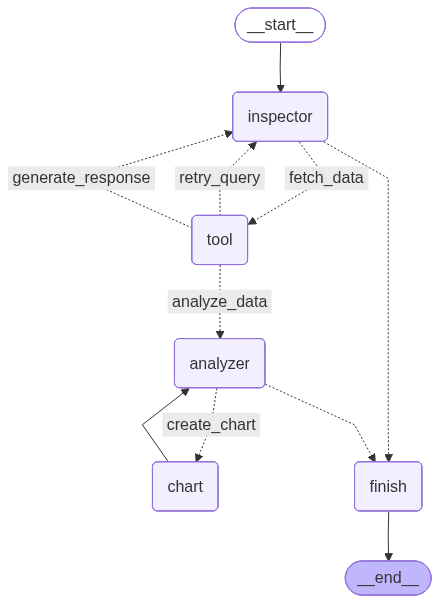

In [1]:
    # Load environment variables
from dotenv import load_dotenv
load_dotenv()

# Import LangGraph components with absolute imports
from agent.federated_learning.monitoring.workflow import federated_monitoring_graph

from IPython.display import Image, display # type: ignore
display(Image(federated_monitoring_graph.get_graph().draw_mermaid_png()))

In [2]:
async def run_query(query: str):
    """Run a single query through the monitoring workflow"""
    try:
        inputs = {"messages": [("user", query)]}
        config = {"configurable": {"thread_id": "session"}}
        
        print(f"\n🔄 Processing: {query} \n")
        
        # Must use async because MCP tools require async
        async for state in federated_monitoring_graph.astream(inputs, config=config, stream_mode="values"):
            
            if "messages" in state:
                messages = state["messages"]
                
                print("*" * 100)
                for i, message in enumerate(messages):
                    # add the message type , add name in the 
                    print("-" * 20 + f" Message {i+1} " + "-" * 20 + f" {type(message).__name__} " + "-" * 20 + f" {message.name} " + "-" * 20)
                 
                    if hasattr(message, 'content') and message.content:
                        print(f"📝 {message.content}")
                    elif hasattr(message, 'tool_calls') and message.tool_calls:
                        for tool_call in message.tool_calls:
                            print(f"🔧 Calling: {tool_call.get('name', 'unknown')} - {tool_call.get('args', {})}")
                    else:
                        print(f"📨 {type(message).__name__}: {message}")
                print()
                    
    except Exception as e:
        print(f"❌ Error: {e}")

In [3]:
# Use await instead of asyncio.run() in Jupyter
await run_query("Get the memory usage of the federated learning instance 'federated-learning-sample' over the last 5 hours, with a 5-minute interval.")


🔄 Processing: Get the memory usage of the federated learning instance 'federated-learning-sample' over the last 5 hours, with a 5-minute interval. 

****************************************************************************************************
-------------------- Message 1 -------------------- HumanMessage -------------------- None --------------------
📝 Get the memory usage of the federated learning instance 'federated-learning-sample' over the last 5 hours, with a 5-minute interval.

[2025-09-02 21:46:07] [INFO] [inspector] Inspector Input state has 1 messages
[2025-09-02 21:46:07] [INFO] [session_config] [inspector] Session session/unknown: Starting inspector node
[2025-09-02 21:46:07] [INFO] [state] Node 'inspector' -> active: Understanding user query...
[2025-09-02 21:46:07] [INFO] [mcp_tools] [PERF] Cache miss - fetching MCP tools from servers at 2025-09-02 21:46:07
[2025-09-02 21:47:20] [INFO] [mcp_tools] [PERF] MCP tools fetched: client_init=0.00s, get_tools=73.64s, tot

In [4]:
# Use await instead of asyncio.run() in Jupyter
await run_query("get the the pods in open-cluster-management ns")


🔄 Processing: get the the pods in open-cluster-management ns 

****************************************************************************************************
-------------------- Message 1 -------------------- HumanMessage -------------------- None --------------------
📝 Get the memory usage of the federated learning instance 'federated-learning-sample' over the last 5 hours, with a 5-minute interval.
-------------------- Message 2 -------------------- AIMessage -------------------- None --------------------
🔧 Calling: prom_range - {'query': 'container_memory_usage_bytes{job="cadvisor", image="", pod=~"federated-learning-sample-server-.*", cluster_name="local-cluster"}', 'start': '2025-09-02T08:47:21Z', 'end': '2025-09-02T13:47:21Z', 'step': '5m'}
🔧 Calling: prom_range - {'query': 'container_memory_usage_bytes{job="cadvisor", image="", pod=~"federated-learning-sample-client-.*"}', 'start': '2025-09-02T08:47:21Z', 'end': '2025-09-02T13:47:21Z', 'step': '5m'}
-------------------- 